Here we are looking at 
1. the run wherein we:

i) fixed the carbon store dynamics 

ii)  have a longer minimum leafon period 

iii)  zero out of the 'dayssincecleafon' counter at leaf-on 

iv) Zeroing GDD at leaf flush AND not letting GDD accumulate in the growing season. 

v) Not letting GDD increase between the leaf off event and the beginning of the counting period. 

vs
2. The same thing, PLUS:

vi) Adding the same minimum leaf OFF period (90days) as there is leaf on period.  (GDD3) with the intention of removing the spurious leaf-back-on events. 

N.B. I don't know how these events have got through the GDD trigger in the first instance..

First, we load the python libraries

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Then we choose which simulations to use...

In [2]:
runs = ['clm5-fates_ryanfix_CLD_daily', 'clm5-fates_leafflushing','clm5-fates_leafflushing_dayslfon',\
        'clm5-fates_leafflushing_dayslfon_GDDmods','clm5-fates_leafflushing_dayslfon_GDDmods_phenmin'\
        ,'clm5-fates_leafflushing_dayslfon_GDDmods_phenmin_dayoffmn']

Then we make an ugly list of variables to ignore (the files being large)

(n.b. does anyone know how to make this inclusive rather than exclusive? 
Reading in >10 years of 4x5 output takes nearly forever)

In [3]:
drop={'ACTUAL_IMMOB','ATM_TOPO','BCDEP','BTRAN','CBALANCE_ERROR_BGC','CBALANCE_ERROR_ED','CBALANCE_ERROR_TOTAL',
      'CWD_STOCK_COL','C_LBLAYER','C_STOMATA','DENIT','DSL','DSTDEP','DSTFLXT','EFLXBUILD','EFLX_DYNBAL',
      'EFLX_GRND_LAKE','EFLX_LH_TOT','EFLX_LH_TOT_R','EFLXBUILD','EFLX_DYNBAL','EFLX_GRND_LAKE','EFLX_LH_TOT',
      'EFLX_LH_TOT_R','ERRH2O','ERRH2OSNO','ERRSEB','ERRSOI','FCEV','FCOV','FCTR','FFIX_TO_SMINN','FGEV','FGR',
      'FGR12','FH2OSFC','FIRA','FIRA_R','FIRE','FSA','FSAT','FSDS','FSDSND','FSDSNDLN','FSDSNI','FSDSVD','FSDSVDLN',
      'FSDSVI','FSDSVILN','FSH','FSH_PRECIP_CONVERSION','FSH_G','FSH_R','FSH_RUNOFF_ICE_TO_LIQ','FSH_TO_COUPLER',
      'FSH_V','FSM','FSNO','FSNO_EFF','FSR','FSRND','FSRNDLN','FSRNI','FSRVD','FSRVDLN','FSRVI','GROSS_NMIN','H2OCAN',
      'H2OSNO_TOP','HEAT_CONTENT1','HEAT_FROM_AC','HIA','HIA_R','HIA_U','HUMIDEX','HUMIDEX_R','HUMIDEX_U',
      'ICE_CONTENT1','LAKEICEFRAC_SURF','LAKEICETHICK','LIQUID_CONTENT1','LITR1N','LITR1N_vr','LITR2N','LITR2N_vr',
      'LITR3N','LITR3N_vr','NDEP_TO_SMINN','NET_NMIN','O_SCALAR','PARVEGLN','PBOT','PCT_GLC_MEC','POTENTIAL_IMMOB',
      'QCHARGE','QDRAI','QDRAI_PERCH','QDRAI_XS','QDRIP','QFLOOD','QFLOOD','QFLX_DEW_GRND','QFLX_DEW_SNOW',
      'QFLX_EVAP_TOT','QFLX_ICE_DYNBAL','QFLX_LIQ_DYNBAL','QFLX_SNOW_DRAIN','QFLX_SNOW_DRAIN_ICE','QFLX_SUB_SNOW',
      'QH2OSFC','QICE','QICE_FRZ','QICE_MELT','QINFL','QINTR','QIRRIG','QOVER','QRGWL','QRUNOFF','QRUNOFF_ICE',
      'QRUNOFF_TO_COUPLER','QSNOCPLIQ','QSNOFRZ','QSNOFRZ_ICE','QSNOMELT','QSNOMELT_ICE','QSNO_TEMPUNLOAD',
      'QSNO_WINDUNLOAD','QSNWCPICE', 'QSOIL_ICE','SABG_PEN','SABV','SMINN','SMINN_LEACHED','SMINN_TO_PLANT',
      'SNOBCMCL','SNOBCMSL','SNOCAN','SNODSTMCL','SNODSTMSL','SNOFSRND','SNOFSRND','SNOFSRVD','SNOFSRVI',
      'SNOINTABS','SNOOCMCL','SNOOCMSL','SNOTXMASS','SNOUNLOAD','SNOW_PERSISTENCE','SNOW_SINKS','SNOW_SOURCES',
      'SOIL1N','SOIL1N_vr','SOIL2N','SOIL2N_vr','SOIL3N','SOIL3N_vr','SOILC_HR','SOILICE','SOILLIQ','SOILRESIS',
      'SOILWATER_10CM','SOM_C_LEACHED','SUPPLEMENT_TO_SMINN','SWBGT','SWBGT_U','TAUX','TAUY','TKE1','TLAKE',
      'TREFMNAV','TREFMXAV','TSOI_ICE','T_SCALAR','U10','U10_DUST','URBAN_AC','URBAN_HEAT','VOLR','VOLRMCH',
      'WASTEHEAT','WBT','WBT_R','WBT_U','W_SCALAR','ZBOT','ZWT','ZWT_PERCH'}

In [4]:
run = runs[0]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
#arc = scratch + run + '/run/' 
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds0 = xr.open_mfdataset([f3,f4], drop_variables=drop, decode_times=False)

In [5]:
run = runs[1]
arc = scratch + 'archive/' + run + '/lnd/hist/'
#arc = scratch + run + '/run/'
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds1 = xr.open_mfdataset([f3,f4], drop_variables=drop, decode_times=False)

In [6]:
run = runs[2]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
arc = scratch + run + '/run/'
print(arc)
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds2 = xr.open_mfdataset([f3,f4], drop_variables=drop, decode_times=False)

/glade/scratch/rfisher/clm5-fates_leafflushing_dayslfon/run/


In [7]:
run = runs[3]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
#arc = scratch + run + '/run/'
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds3 = xr.open_mfdataset([f3,f4], drop_variables=drop, decode_times=False)

In [8]:
run = runs[4]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
#arc = scratch + run + '/run/'
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds4 = xr.open_mfdataset([f3,f4], drop_variables=drop, decode_times=False)

In [10]:
run = runs[5]
scratch = '/glade/scratch/rfisher/'
arc = scratch + 'archive/' + run + '/lnd/hist/'
#arc = scratch + run + '/run/'
f1=(arc +run+'.clm2.h0.2001-01-01-00000.nc')
f2=(arc +run+'.clm2.h0.2002-01-01-00000.nc')
f3=(arc +run+'.clm2.h0.2003-01-01-00000.nc')
f4=(arc +run+'.clm2.h0.2004-01-01-00000.nc')
ds5 = xr.open_mfdataset([f3,f4], drop_variables=drop, decode_times=False)

In [11]:
#plotting years
yr1=2
yr2=4

Looking at NH summertime LAI, there isn't much difference between runs, but the distribution looks a lot more sensible than when we started.

N.B. That LAIs are really quite large. Probably something parametric that we should try and quosh. 

<xarray.DataArray 'TLAI' (time: 730, lat: 46, lon: 72)>
dask.array<shape=(730, 46, 72), dtype=float32, chunksize=(365, 46, 72)>
Coordinates:
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
  * time     (time) float64 730.0 731.0 732.0 ... 1.457e+03 1.458e+03 1.459e+03
Attributes:
    long_name:     total projected leaf area index
    units:         none
    cell_methods:  time: mean
<xarray.DataArray 'TLAI' (time: 730, lat: 46, lon: 72)>
dask.array<shape=(730, 46, 72), dtype=float32, chunksize=(365, 46, 72)>
Coordinates:
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 ... 78.0 82.0 86.0 90.0
  * time     (time) float64 730.0 731.0 732.0 ... 1.457e+03 1.458e+03 1.459e+03
Attributes:
    long_name:     total projected leaf area index
    units:         none
    cell_methods:  time: mean


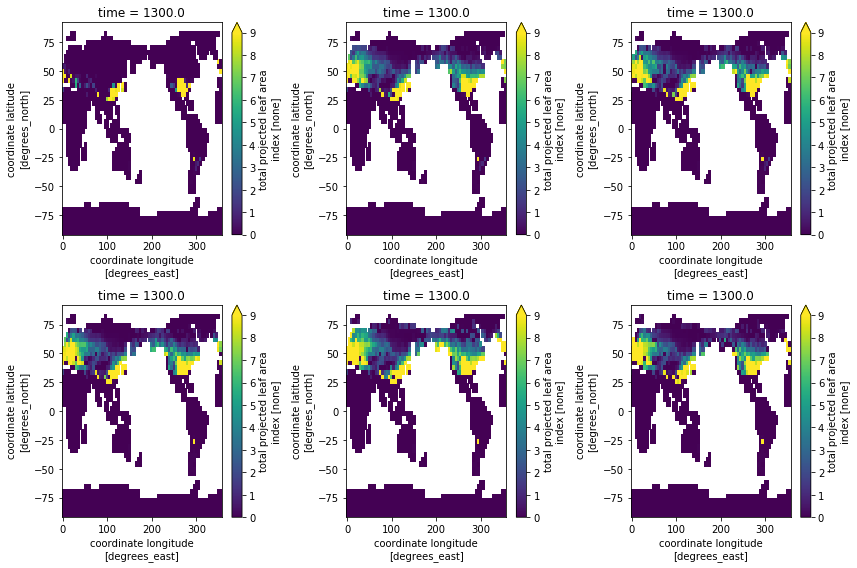

In [12]:
plt.rcParams['figure.figsize'] = [12, 8]
fig,([ax0, ax1,ax2],[ax3, ax4,ax5]) = plt.subplots(ncols=3, nrows=2)
print(ds0.TLAI)
t=ds0.TLAI.sizes['time']-160
ds0.TLAI[t,:,:].plot(ax=ax0,vmax=9)
ds1.TLAI[t,:,:].plot(ax=ax1,vmax=9)
print(ds2.TLAI)
ds2.TLAI[t,:,:].plot(ax=ax2,vmax=9)
ds3.TLAI[t,:,:].plot(ax=ax3,vmax=9)
ds4.TLAI[t,:,:].plot(ax=ax4,vmax=9)
ds5.TLAI[t,:,:].plot(ax=ax5,vmax=9)
plt.tight_layout()

First lets look at the GDDs and leaf biomass for the NE USA.

Text(0.5, 1, 'min leaf off time')

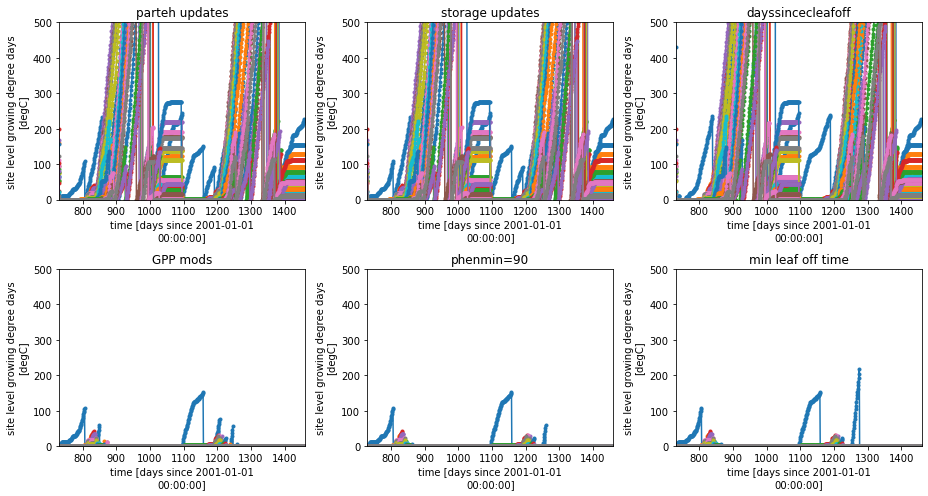

In [13]:
plt.rcParams['figure.figsize'] = [13, 7]
fig,([ax0, ax1,ax2], [ax3,ax4, ax5]) = plt.subplots(ncols=3, nrows=2)
lats=range(36,38)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
ymx=500
for l in lats:
   ds0.SITE_GDD.isel(lat=l, lon=lons).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds1.SITE_GDD.isel(lat=l, lon=lons).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds2.SITE_GDD.isel(lat=l, lon=lons).plot.line(ax=ax2,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds3.SITE_GDD.isel(lat=l, lon=lons).plot.line(ax=ax3,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds4.SITE_GDD.isel(lat=l, lon=lons).plot.line(ax=ax4,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds5.SITE_GDD.isel(lat=l, lon=lons).plot.line(ax=ax5,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
plt.tight_layout()

ax0.set_title('parteh updates')
ax1.set_title('storage updates')
ax2.set_title('dayssincecleafoff')
ax3.set_title('GPP mods')
ax4.set_title('phenmin=90')
ax5.set_title('min leaf off time')

In [ ]:
plt.rcParams['figure.figsize'] = [13, 7]
fig,([ax0, ax1,ax2], [ax3,ax4, ax5]) = plt.subplots(ncols=3, nrows=2)
lats=range(36,38)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
ymx=100
for l in lats:
   ds0.PFTleafbiomass.isel(lat=l, lon=lons, fates_levpft=1).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))   
   ds1.PFTleafbiomass.isel(lat=l, lon=lons, fates_levpft=1).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds2.PFTleafbiomass.isel(lat=l, lon=lons, fates_levpft=1).plot.line(ax=ax2,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds3.PFTleafbiomass.isel(lat=l, lon=lons, fates_levpft=1).plot.line(ax=ax3,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds4.PFTleafbiomass.isel(lat=l, lon=lons, fates_levpft=1).plot.line(ax=ax4,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds5.PFTleafbiomass.isel(lat=l, lon=lons, fates_levpft=1).plot.line(ax=ax5,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
plt.tight_layout()

ax0.set_title('parteh updates')
ax1.set_title('storage updates')
ax2.set_title('dayssincecleafoff')
ax3.set_title('GPP mods')
ax4.set_title('phenmin=90')
ax5.set_title('min leaf off time')

The LEFT panel shows where the previous run had erroneous leaf-on events. These we matched by changes in both the leaf status, and the daysssincecleafon counter. I do not know how they got through the GDD if statement. 

Adding a mandatory OFF period  (RIGHT panels) seems to eradicate the spurious leaf-on events, with the caveat that they shouldn't really have been happening at all... 

Lets plot some LAI from South America. These were pretty crazy before, but now they look pretty much OK (except some sites which have spurious leaf loss in the early summer). 

Here are the GDD and leafc dynamics for S. America

In [ ]:
plt.rcParams['figure.figsize'] = [13, 7]
fig,([ax0, ax1,ax2], [ax3,ax4, ax5]) = plt.subplots(ncols=3, nrows=2)
lats=range(36,38)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
ymx=370
for l in lats:
   ds0.SITE_DAYSINCE_COLDLEAFON.isel(lat=l, lon=lons).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds1.SITE_DAYSINCE_COLDLEAFON.isel(lat=l, lon=lons).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds2.SITE_DAYSINCE_COLDLEAFON.isel(lat=l, lon=lons).plot.line(ax=ax2,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds3.SITE_DAYSINCE_COLDLEAFON.isel(lat=l, lon=lons).plot.line(ax=ax3,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds4.SITE_DAYSINCE_COLDLEAFON.isel(lat=l, lon=lons).plot.line(ax=ax4,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds5.SITE_DAYSINCE_COLDLEAFON.isel(lat=l, lon=lons).plot.line(ax=ax5,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
plt.tight_layout()

ax0.set_title('parteh updates')
ax1.set_title('storage updates')
ax2.set_title('dayssincecleafoff')
ax3.set_title('GPP mods')
ax4.set_title('phenmin=90')
ax5.set_title('min leaf off time')
    

Here are the leaf on-leaf-off counters, which look better in the new version on the right hand side. 

In [ ]:
plt.rcParams['figure.figsize'] = [13, 7]
fig,([ax0, ax1,ax2], [ax3,ax4, ax5]) = plt.subplots(ncols=3, nrows=2)
lats=range(36,38)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
ymx=370
for l in lats:
   ds0.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l, lon=lons).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds1.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l, lon=lons).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds2.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l, lon=lons).plot.line(ax=ax2,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds3.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l, lon=lons).plot.line(ax=ax3,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds4.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l, lon=lons).plot.line(ax=ax4,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
   ds5.SITE_DAYSINCE_COLDLEAFOFF.isel(lat=l, lon=lons).plot.line(ax=ax5,x='time',add_legend=False, marker='.', xlim=(xmn,xmx), ylim=(0,ymx))
plt.tight_layout()

ax0.set_title('parteh updates')
ax1.set_title('storage updates')
ax2.set_title('dayssincecleafoff')
ax3.set_title('GPP mods')
ax4.set_title('phenmin=90')
ax5.set_title('min leaf off time')

-------------------------
There are still some issues with the GDD threshold. Here are the maximum attained GDDs....


In [ ]:
np.max(ds1.SITE_GDD,0).plot(vmax=600)

and here are the maximum chill days

In [ ]:
np.max(ds1.SITE_NCHILLDAYS,0).plot()

In [ ]:
plt.rcParams['figure.figsize'] = [9, 7]
fig,([ax0, ax1],[ax2, ax3]) = plt.subplots(ncols=2, nrows=2)
lats=range(36,38)
lons=range(46,60)
xmn=365*yr1
xmx=365*yr2
ymx=900
a=-0.001 * ds0.SITE_NCHILLDAYS
b=-0.001 * ds1.SITE_NCHILLDAYS
gdd_th0=-68 + 638*np.exp(a)
gdd_th1=-68 + 638*np.exp(b)
for l in lats:
   ds0.SITE_NCHILLDAYS.isel(lat=l,  lon=lons).plot.line(ax=ax0,x='time',add_legend=False, marker='.', xlim=(xmn,xmx))
   ds1.SITE_NCHILLDAYS.isel(lat=l,  lon=lons).plot.line(ax=ax1,x='time',add_legend=False, marker='.', xlim=(xmn,xmx))
   gdd_th0.isel(lat=l,  lon=lons).plot.line(ax=ax2,x='time',add_legend=False, marker='.', xlim=(xmn,xmx))
   gdd_th1.isel(lat=l, lon=lons).plot.line(ax=ax3,x='time',add_legend=False, marker='.', xlim=(xmn,xmx)) 
plt.tight_layout()

In [ ]:
plt.scatter(np.max(ds1.SITE_NCHILLDAYS,0),np.max(ds1.SITE_GDD,0))
plt.ylim(0,600)
plt.ylim(0,350)
plt.title('Smoothing effect vs LAI')

Here is the inter-relationship between the chilling day minimum and the maximum GDD...

In [ ]:
pftfile='/glade/u/home/rfisher/python_scripts/fates_cld_phenmin.nc'
pfts = xr.open_dataset(pftfile)
#print(pfts.fates_phen_a)
#print(pfts.fates_phen_b)
#print(pfts.fates_phen_c)
#print(pfts.fates_phen_chiltemp)
#print(pfts.fates_phen_mindayson)

xmn=365*yr1
xmx=365*yr2
ymx=900
a=-0.001 * ds0.SITE_NCHILLDAYS
b=-0.001 * ds1.SITE_NCHILLDAYS
gdd_th0=-68 + 638*np.exp(a)
gdd_th1=-68 + 638*np.exp(b)

plt.scatter(ds1.SITE_NCHILLDAYS,gdd_th1)
plt.title('Smoothing effect vs LAI')


and here is the same thing predicted from the euqation. Note that the threshold GDD is never less than 350...